# Analysis of RTO data

In [1]:
from nbimports import *

In [2]:
import processing
processing = reload(processing)

In [7]:
filename = "../data/user/data_25042022_170416.csv"

## data

In [19]:
data = pd.read_csv(filename, index_col=0)
data.columns = ['source', 'data']

In [22]:
data_df = processing.format_data(select(data, source='/data'))

In [23]:
data_df.head()

,key,t0,ts,stroke_id,x,y,p,x_,y_,p_,x0,y0,p0,x1,y1,p1
0,3385669_50,3385669,50,86,0.190597,0.871407,0.020043,-0.000878,0.001198,0.007429,-0.000012,0.000017,0.000424,-0.000005,0.000007,0.000140
1,3385689_60,3385689,60,86,0.190066,0.872000,0.020426,-0.001408,0.001791,0.007813,-0.000038,0.000051,0.000975,-0.000013,0.000018,0.000283
2,3385689_70,3385689,70,86,0.188507,0.873480,0.019432,-0.002967,0.003271,0.006818,-0.000093,0.000126,0.001869,-0.000029,0.000039,0.000491
3,3385710_80,3385710,80,86,0.186976,0.874731,0.018268,-0.004499,0.004522,0.005655,-0.000199,0.000266,0.003088,-0.000058,0.000076,0.000740
4,3385710_90,3385710,90,86,0.185557,0.875065,0.016429,-0.005918,0.004857,0.003815,-0.000384,0.000501,0.004499,-0.000106,0.000134,0.000980


<AxesSubplot:>

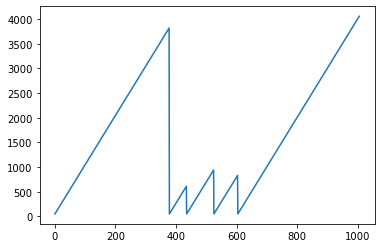

In [24]:
# data['timestamp'].plot()
data_df['ts'].plot()

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='x', ylabel='y'>

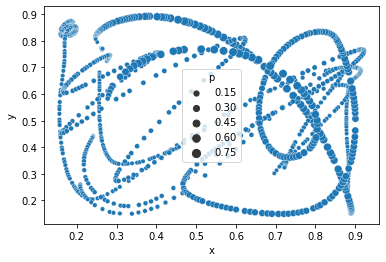

In [26]:
sns.scatterplot(data=data_df, x='x', y='y', size='p')

In [27]:
set(data_df['stroke_id'])

{86, 87, 88, 89, 90}

<AxesSubplot:xlabel='x', ylabel='y'>

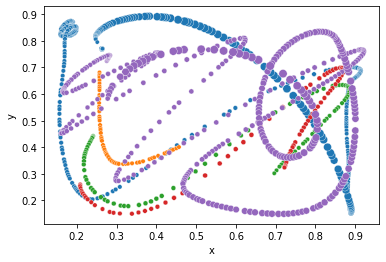

In [28]:
sns.scatterplot(data=data_df, x='x', y='y', size='p', hue='stroke_id', palette='tab10', legend=False)

In [29]:
data.shape

(1737, 2)

In [30]:
import plotly.graph_objs as go

In [31]:
hovertext = np.c_[data_df['stroke_id'].index, data_df['stroke_id'].values].astype(int)

In [32]:
fig = go.FigureWidget()
scatter = go.Scatter(x=data_df['x'], y=data_df['y'], 
                     opacity=.1, marker={'color':'black'}, 
                     customdata=hovertext, 
                     hovertemplate='%{customdata[1]}[%{customdata[0]}]',
                     mode='markers', )
fig.add_trace(scatter)
scatter = fig.data[0]

def hover(trace, points, selector):
    point_ind = points.point_inds[0]
    n_stroke = data_df.iloc[point_ind]['stroke_id']
    trace = data_df[data_df['stroke_id'] == n_stroke]
    trace_scatter = go.Scatter(x=trace['x'], y=trace['y'], 
                               opacity=1, marker={'color':'red'}, mode='markers',
                               customdata=trace.index,
                               hovertemplate=str(n_stroke)+'[%{customdata}]',)
    fig.data = (fig.data[0], )    
    fig.add_trace(trace_scatter)
scatter.on_click(hover)

fig.update_layout(
    # autosize=False,
    # width=1000,
    # height=1000,
)

FigureWidget({
    'data': [{'customdata': array([[   0,   86],
                                   [   1,   86…

## features

In [33]:
import processing
processing = reload(processing)

In [37]:
feat_df = processing.format_feat(select(data, source='/feat'))

<AxesSubplot:>

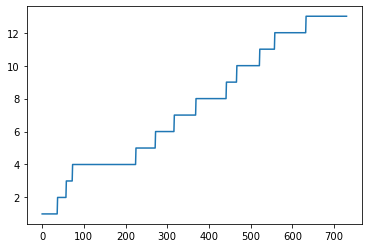

In [38]:
feat_df['segment_id'].plot()

The scale of the different features should be comparable for the DTW to take them into account equally. Alternatively, we could compute a Mahalanobis distance from a small batch of data.

<AxesSubplot:>

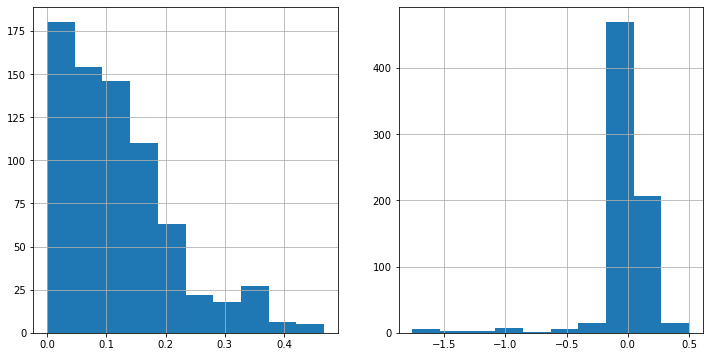

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
feat_df['s'].hist(ax=ax[0])
feat_df['da'].hist(ax=ax[1])

<AxesSubplot:>

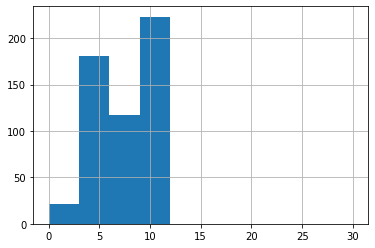

In [40]:
feat_df['min_dtw'].hist(range=(0, 30))

In [41]:
np.count_nonzero(feat_df.groupby('segment_id').size() < 11)

0

In [42]:
gi = feat_df.groupby('segment_id').get_group(2)

In [43]:
gi = gi.join(data_df.set_index('key'), on='key').copy()

In [44]:
gi.head()

,key,segment_id,s,da,min_dtw,min_dtw_id,t0,ts,stroke_id,x,...,p,x_,y_,p_,x0,y0,p0,x1,y1,p1
37,3386035_420,2,0.035267,0.162938,2.958869,0,3386035,420,86,0.188264,...,0.020692,-0.003211,-0.012460,0.008078,0.006670,-0.030766,0.008715,0.001366,0.003251,-0.000894
38,3386048_430,2,0.035742,0.162938,2.958869,0,3386048,430,86,0.183865,...,0.021709,-0.007610,-0.013331,0.009095,0.006791,-0.026941,0.007110,0.000867,0.003467,-0.001243
39,3386073_440,2,0.036393,0.162938,2.958869,0,3386073,440,86,0.179444,...,0.022395,-0.012031,-0.014788,0.009782,0.006278,-0.023040,0.005950,0.000325,0.003625,-0.001321
40,3386073_450,2,0.036804,0.178246,2.958869,0,3386073,450,86,0.177374,...,0.022236,-0.014101,-0.015862,0.009623,0.005047,-0.019315,0.005442,-0.000274,0.003670,-0.001126
41,3386073_460,2,0.036541,0.204864,2.958869,0,3386073,460,86,0.175304,...,0.022077,-0.016171,-0.016936,0.009464,0.003052,-0.016096,0.005619,-0.000929,0.003534,-0.000717


In [45]:
gi.columns

Index(['key', 'segment_id', 's', 'da', 'min_dtw', 'min_dtw_id', 't0', 'ts',
       'stroke_id', 'x', 'y', 'p', 'x_', 'y_', 'p_', 'x0', 'y0', 'p0', 'x1',
       'y1', 'p1'],
      dtype='object')

<AxesSubplot:>

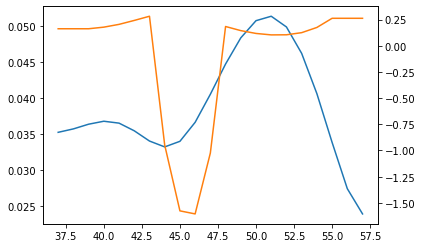

In [46]:
fig, ax = plt.subplots()
gi['s'].plot(ax=ax)
axt = ax.twinx()
gi['da'].plot(ax=axt, c=tab10[1])

In [47]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [48]:
alpha = np.arctan2(gi['y1'], gi['x1'])
da = scsig.savgol_filter(alpha, deriv=1, **savgol_dict)

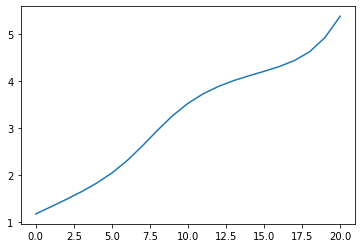

In [51]:
plt.plot(np.unwrap(alpha))

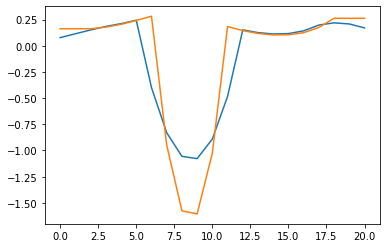

In [49]:
plt.plot(da)
plt.plot(gi['da'].values)

<AxesSubplot:xlabel='x', ylabel='y'>

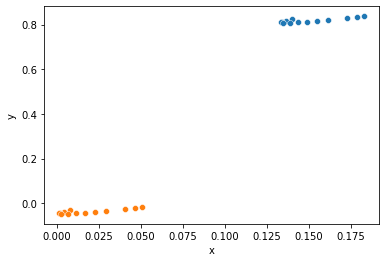

In [87]:
sns.scatterplot(data=gi, x='x', y='y')
sns.scatterplot(data=gi, x='x_', y='y_')

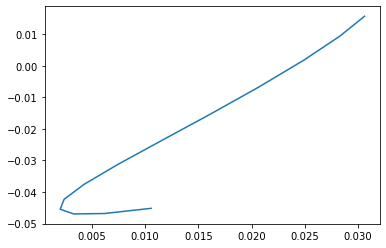

In [88]:
plt.plot(gi['x0'], gi['y0'])

In [84]:
wl=7
po=2
savgol_dict = {'window_length':wl, 'polyorder':po, 'mode':'nearest'}

In [89]:
gi['x1_'] = scsig.savgol_filter(gi['x0'], deriv=1, **savgol_dict)
gi['y1_'] = scsig.savgol_filter(gi['y0'], deriv=1, **savgol_dict)

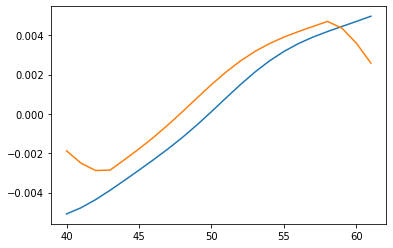

In [90]:
plt.plot(gi['x1'])
plt.plot(gi['x1_'])

In [94]:
s = np.linalg.norm(gi[['x1', 'y1']], axis=1)

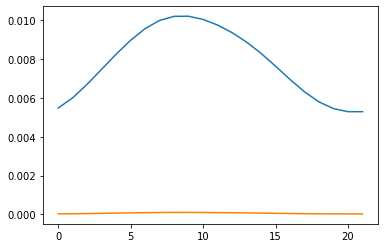

In [97]:
plt.plot(s)
plt.plot(gi['s'].values)

In [54]:
alpha = np.arctan2(gi['y1'], gi['x1'])

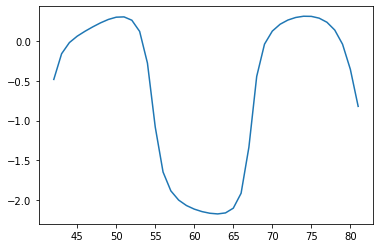

In [55]:
plt.plot(alpha)

In [117]:
# # fig = go.Figure()
# from plotly.subplots import make_subplots
# fig = make_subplots(specs=[[{"secondary_y": True}]])

# scatter = go.Scatter(x=trace['ts'], y=feat['s'], mode='lines', name='speed')
# fig.add_trace(scatter)
# scatter = go.Scatter(x=trace['ts'], y=feat['da'], mode='lines', name='dAngle')
# fig.add_trace(scatter, secondary_y=True)